# Participant ID:S05

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [4]:
## Read the CSV file into a DataFrame
S05_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S05_final_df.csv'

S05_df = pd.read_csv(S05_path, index_col=False, parse_dates=['DateTime'])

In [3]:
S05_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [4]:
# Set 'DateTime' column as the index
S05_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S05_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Min_Temp(C)_N1', 'Max_Temp(C)_N1', 'Avg_Temp(C)_N1',
                                            'Min_RH(%)_N1', 'Max_RH(%)_N1', 'Avg_RH(%)_N1'])

# Print the results as a table
print(results_df)

  ID_instance          Start Time            End Time        Duration  \
0       S05_1 2023-08-29 07:06:57 2023-08-29 07:17:01 0 days 00:10:04   
1       S05_2 2023-08-30 07:16:37 2023-08-30 07:24:30 0 days 00:07:53   
2       S05_3 2023-08-31 06:50:06 2023-08-31 06:59:39 0 days 00:09:33   
3       S05_4 2023-09-05 06:34:03 2023-09-05 06:56:21 0 days 00:22:18   

   Min_Temp(C)_N1  Max_Temp(C)_N1  Avg_Temp(C)_N1  Min_RH(%)_N1  Max_RH(%)_N1  \
0          15.985          16.037       16.006655          71.2          71.4   
1          15.422          15.432       15.426686          84.4          84.6   
2          15.423          15.438       15.432010          90.3          90.6   
3          17.287          17.380       17.326614          49.7          50.0   

   Avg_RH(%)_N1  
0     71.385124  
1     84.451477  
2     90.576481  
3     49.883271  


In [5]:
# Group by 'id_instance' and calculate time duration
time_duration = S05_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S05_1    10.07
S05_2     7.88
S05_3     9.55
S05_4    22.30
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_22636\2001208054.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S05_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S05_df.drop(S05_df[S05_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S05_df.isnull().sum()

ID_instance          3
hrv_vlf              0
hrv_lf               0
hrv_hf               0
hrv_sdnn             0
hrv_rmssd            0
hrv_mean_nni         0
hrv_median_nni       0
hrv_range_nni        0
hrv_entropy          0
eda_tonic_mean       0
eda_tonic_std        0
eda_tonic_sum        0
eda_tonic_energy     0
eda_phasic_mean      0
eda_phasic_std       0
eda_phasic_sum       0
eda_phasic_energy    0
acc_acc_x_min        0
acc_acc_y_min        0
acc_acc_z_min        0
acc_l2_min           0
acc_acc_x_max        0
acc_acc_y_max        0
acc_acc_z_max        0
acc_l2_max           0
acc_acc_x_ptp        0
acc_acc_y_ptp        0
acc_acc_z_ptp        0
acc_l2_ptp           0
Temp(C)_N1           0
RH(%)_N1             0
Dewpoint(C)_N1       0
Temp(C)_N2           0
RH(%)_N2             0
Dewpoint(C)_N2       0
Temp(C)_N3           0
RH(%)_N3             0
Dewpoint(C)_N3       0
Temp(C)_N4           0
RH(%)_N4             0
Dewpoint(C)_N4       0
Temp(C)_N5           0
RH(%)_N5   

In [7]:
S05_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S05_df['ID_instance'].unique()

array(['S05_1', 'S05_2', 'S05_3', 'S05_4'], dtype=object)

In [9]:
S05_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S05_df = S05_df.filter(regex='^(?!acc_)')

In [11]:
S05_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S05_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S05_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S05_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S05_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.417898,-0.217759,-0.142963,0.408581,-0.142696,-0.042965,0.426059,-0.083974,0.011426,0.305162,-0.065480,0.054450
hrv_lf,0.264581,-0.117613,-0.057077,0.279585,-0.089129,-0.007171,0.291050,-0.539468,-0.481211,0.180358,0.007692,0.092741
hrv_hf,0.266583,-0.048192,0.042734,0.253024,0.063078,0.189863,0.267310,-0.155409,-0.044499,0.140390,0.115474,0.255834
hrv_sdnn,0.260107,-0.018205,0.074467,0.251729,0.070734,0.194056,0.261846,-0.226906,-0.122087,0.099641,0.164579,0.288123
hrv_rmssd,0.173294,0.089043,0.188398,0.163038,0.178082,0.305518,0.167759,-0.276194,-0.163554,-0.009255,0.281747,0.408593
hrv_mean_nni,0.111384,0.173983,0.264887,0.111459,0.260799,0.380301,0.106798,-0.359400,-0.261670,-0.082206,0.322617,0.441571
hrv_median_nni,0.135593,0.147609,0.237539,0.139854,0.242181,0.365931,0.137627,-0.365748,-0.266624,-0.050461,0.296552,0.422371
hrv_range_nni,0.252048,-0.030129,0.056298,0.245219,0.059102,0.174490,0.256170,-0.285788,-0.185668,0.116873,0.144997,0.268795
hrv_entropy,-0.174862,-0.056455,-0.130230,-0.177902,-0.128250,-0.232920,-0.179127,0.539445,0.456080,-0.028738,-0.176052,-0.297177
eda_tonic_mean,-0.631498,0.662424,0.641985,-0.622434,0.689081,0.667169,-0.625723,-0.426525,-0.456087,-0.664522,0.676697,0.670187


### Correlation heatmap

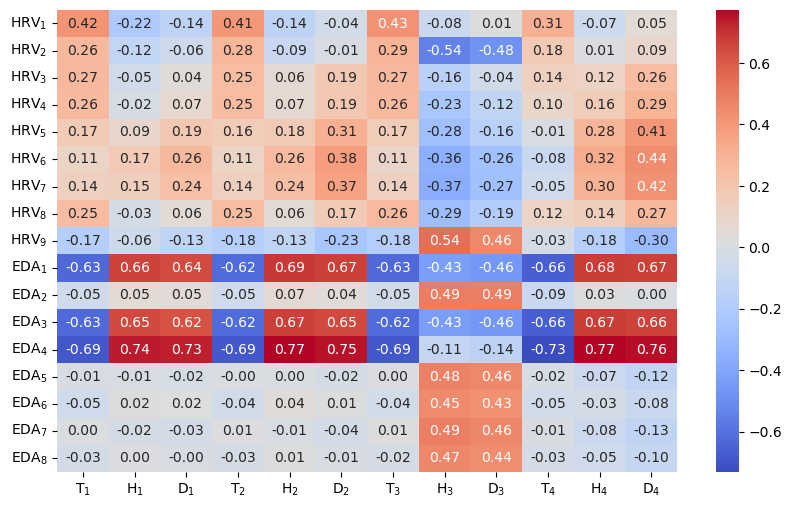

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S05')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S05_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S05_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S05_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S05_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S05_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S05_df['Temp(C)_N1'].quantile(0.30), S05_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S05_df['RH(%)_N1'].quantile(0.30), S05_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S05_df['lambda'] = S05_df.apply(comfort_label, axis=1)
label_counts = S05_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S05.pkl'
S05_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_vlf
EDA Variable: eda_tonic_energy
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    60.360963
0.5    39.639037
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_22636\579328878.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S05_df['lambda'] = S05_df.apply(comfort_label, axis=1)


In [16]:
# Group by unique instances
instance_groups = S05_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S05_1    0.500000
S05_2    0.000000
S05_3    0.000000
S05_4    0.216953
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [17]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [18]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S05_1", "Start Time" : "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time" : "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time" : "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time" : "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"}
]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S05_1,2023-08-29 07:06:57,2023-08-29 07:17:01
1,S05_2,2023-08-30 07:16:37,2023-08-30 07:24:30
2,S05_3,2023-08-31 06:50:06,2023-08-31 06:59:39
3,S05_4,2023-09-05 06:34:03,2023-09-05 06:56:21


In [19]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S05_1,15.12,15.20,15.160,99.3,99.33,99.31,22.780
1,S05_2,14.26,14.38,14.310,99.3,99.32,99.31,4.850
2,S05_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S05_4,16.44,17.20,16.835,57.7,62.02,59.82,7.035


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [20]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-08-29 08:00:00", "2023-08-29 18:00:00"),
    ("2023-08-30 08:00:00", "2023-08-30 18:00:00"),
    ("2023-08-31 08:00:00", "2023-08-31 18:00:00"),
    ("2023-09-05 08:00:00", "2023-09-05 18:00:00")
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-08-29 08:00:00 to 2023-08-29 18:00:00,15.58,20.43,17.439180,64.36,99.36,84.170328,243.795082
1,2023-08-30 08:00:00 to 2023-08-30 18:00:00,14.28,21.25,18.125082,57.44,99.34,79.341475,319.863770
2,2023-08-31 08:00:00 to 2023-08-31 18:00:00,15.71,25.89,21.696393,41.28,99.29,59.893279,678.981639
3,2023-09-05 08:00:00 to 2023-09-05 18:00:00,18.50,25.40,22.812623,32.75,56.26,41.464262,634.005410


### Living Lab (Day of Commuting from 8am to 6pm):

In [21]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-08-29 08:00:00", "2023-08-29 18:00:00"),
    ("2023-08-30 08:00:00", "2023-08-30 18:00:00"),
    ("2023-08-31 08:00:00", "2023-08-31 18:00:00"),
    ("2023-09-05 08:00:00", "2023-09-05 18:00:00")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_percentage,Door_open_percentage
0,2023-08-29 08:00:00,2023-08-29 18:00:00,23.023926,24.769043,24.074040,-242.455124,-242.455124,-242.455124,50.636948,55.758369,52.663076,7.465553,944.033813,243.155883,40.913254,6.820291,12.500000,67.500000
1,2023-08-30 08:00:00,2023-08-30 18:00:00,22.989502,24.314941,23.674762,-242.455124,-242.455124,-242.455124,52.605659,55.371811,54.300031,17.633247,744.818115,247.474609,39.858904,7.609579,0.833333,75.833333
2,2023-08-31 08:00:00,2023-08-31 18:00:00,23.070313,25.265869,23.865061,-242.455124,-242.455124,-242.455124,50.570572,55.687607,53.248292,67.537880,2180.563232,233.826730,40.856436,14.084519,0.833333,54.166667
3,2023-09-05 08:00:00,2023-09-05 18:00:00,23.438721,26.397217,24.849707,-242.455124,-242.455124,-242.455124,39.024677,45.022324,42.432383,24.323845,1567.725586,180.234311,44.947616,15.462017,44.166667,56.666667


# Living Lab (Before arrivel and after arrivel)

In [5]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-08-29 07:06:57", "2023-08-29 07:17:01"),
    ("2023-08-30 07:16:37", "2023-08-30 07:24:30"),
    ("2023-08-31 06:50:06", "2023-08-31 06:59:39"),
    ("2023-09-05 06:34:03", "2023-09-05 06:56:21")

]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_%,Door_open_%
0,2023-08-29 07:06:57,2023-08-29 07:17:01,24.883057,24.886963,24.885010,-242.455124,-242.455124,-242.455124,50.658348,50.668152,50.663250,20.174789,21.777153,20.975971,0.292263,0.110122,0.0,0.0
1,2023-08-30 07:16:37,2023-08-30 07:24:30,24.106445,24.201416,24.153931,-242.455124,-242.455124,-242.455124,53.410370,53.510925,53.460648,15.516090,19.063377,17.289734,0.528885,0.114724,0.0,0.0
2,2023-08-31 06:50:06,2023-08-31 06:59:39,23.581299,23.590332,23.585816,-242.455124,-242.455124,-242.455124,55.117981,55.266602,55.192291,44.672394,47.716713,46.194553,0.558611,0.114710,0.0,0.0
3,2023-09-05 06:34:03,2023-09-05 06:56:21,25.191162,25.213867,25.197754,-242.455124,-242.455124,-242.455124,41.857788,41.941444,41.878997,16.304588,18.712807,17.515659,1.112502,0.518993,0.0,0.0


In [7]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S05_1", "Start Time": "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time": "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time": "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time": "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Initialize lists to store results
before_results_list = []
after_results_list = []

# Process each commuting instance
for instance in commuting_instances:
    start_time = instance["Start Time"]
    end_time = instance["End Time"]
    one_hour_before = start_time - timedelta(hours=1)
    one_hour_after = end_time + timedelta(hours=1)
    
    # Filter data for one hour before the start time
    before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
    
    # Calculate required metrics for before one hour
    before_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'Before',
        'Start_Time': one_hour_before,
        'End_Time': start_time,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the before results list
    before_results_list.append(before_result)
    
    # Filter data for one hour after the end time
    after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]
    
    # Calculate required metrics for after one hour
    after_result = {
        'ID_instance': instance["ID_instance"],
        'Time_Interval': 'After',
        'Start_Time': end_time,
        'End_Time': one_hour_after,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the after results list
    after_results_list.append(after_result)

# Create DataFrames from the results lists
before_results_df = pd.DataFrame(before_results_list)
after_results_df = pd.DataFrame(after_results_list)


before_results_df, after_results_df


(  ID_instance Time_Interval          Start_Time            End_Time  \
 0       S05_1        Before 2023-08-29 06:06:57 2023-08-29 07:06:57   
 1       S05_2        Before 2023-08-30 06:16:37 2023-08-30 07:16:37   
 2       S05_3        Before 2023-08-31 05:50:06 2023-08-31 06:50:06   
 3       S05_4        Before 2023-09-05 05:34:03 2023-09-05 06:34:03   
 
    Min_Temp_Air  Max_Temp_Air  Avg_Temp_Air  Min_Temp_Globe  Max_Temp_Globe  \
 0     25.191162     25.213867     25.197754     -242.455124     -242.455124   
 1     25.191162     25.213867     25.197754     -242.455124     -242.455124   
 2     25.191162     25.213867     25.197754     -242.455124     -242.455124   
 3     25.191162     25.213867     25.197754     -242.455124     -242.455124   
 
    Avg_Temp_Globe  Min_Relative_Humidity  Max_Relative_Humidity  \
 0     -242.455124              41.857788              41.941444   
 1     -242.455124              41.857788              41.941444   
 2     -242.455124              

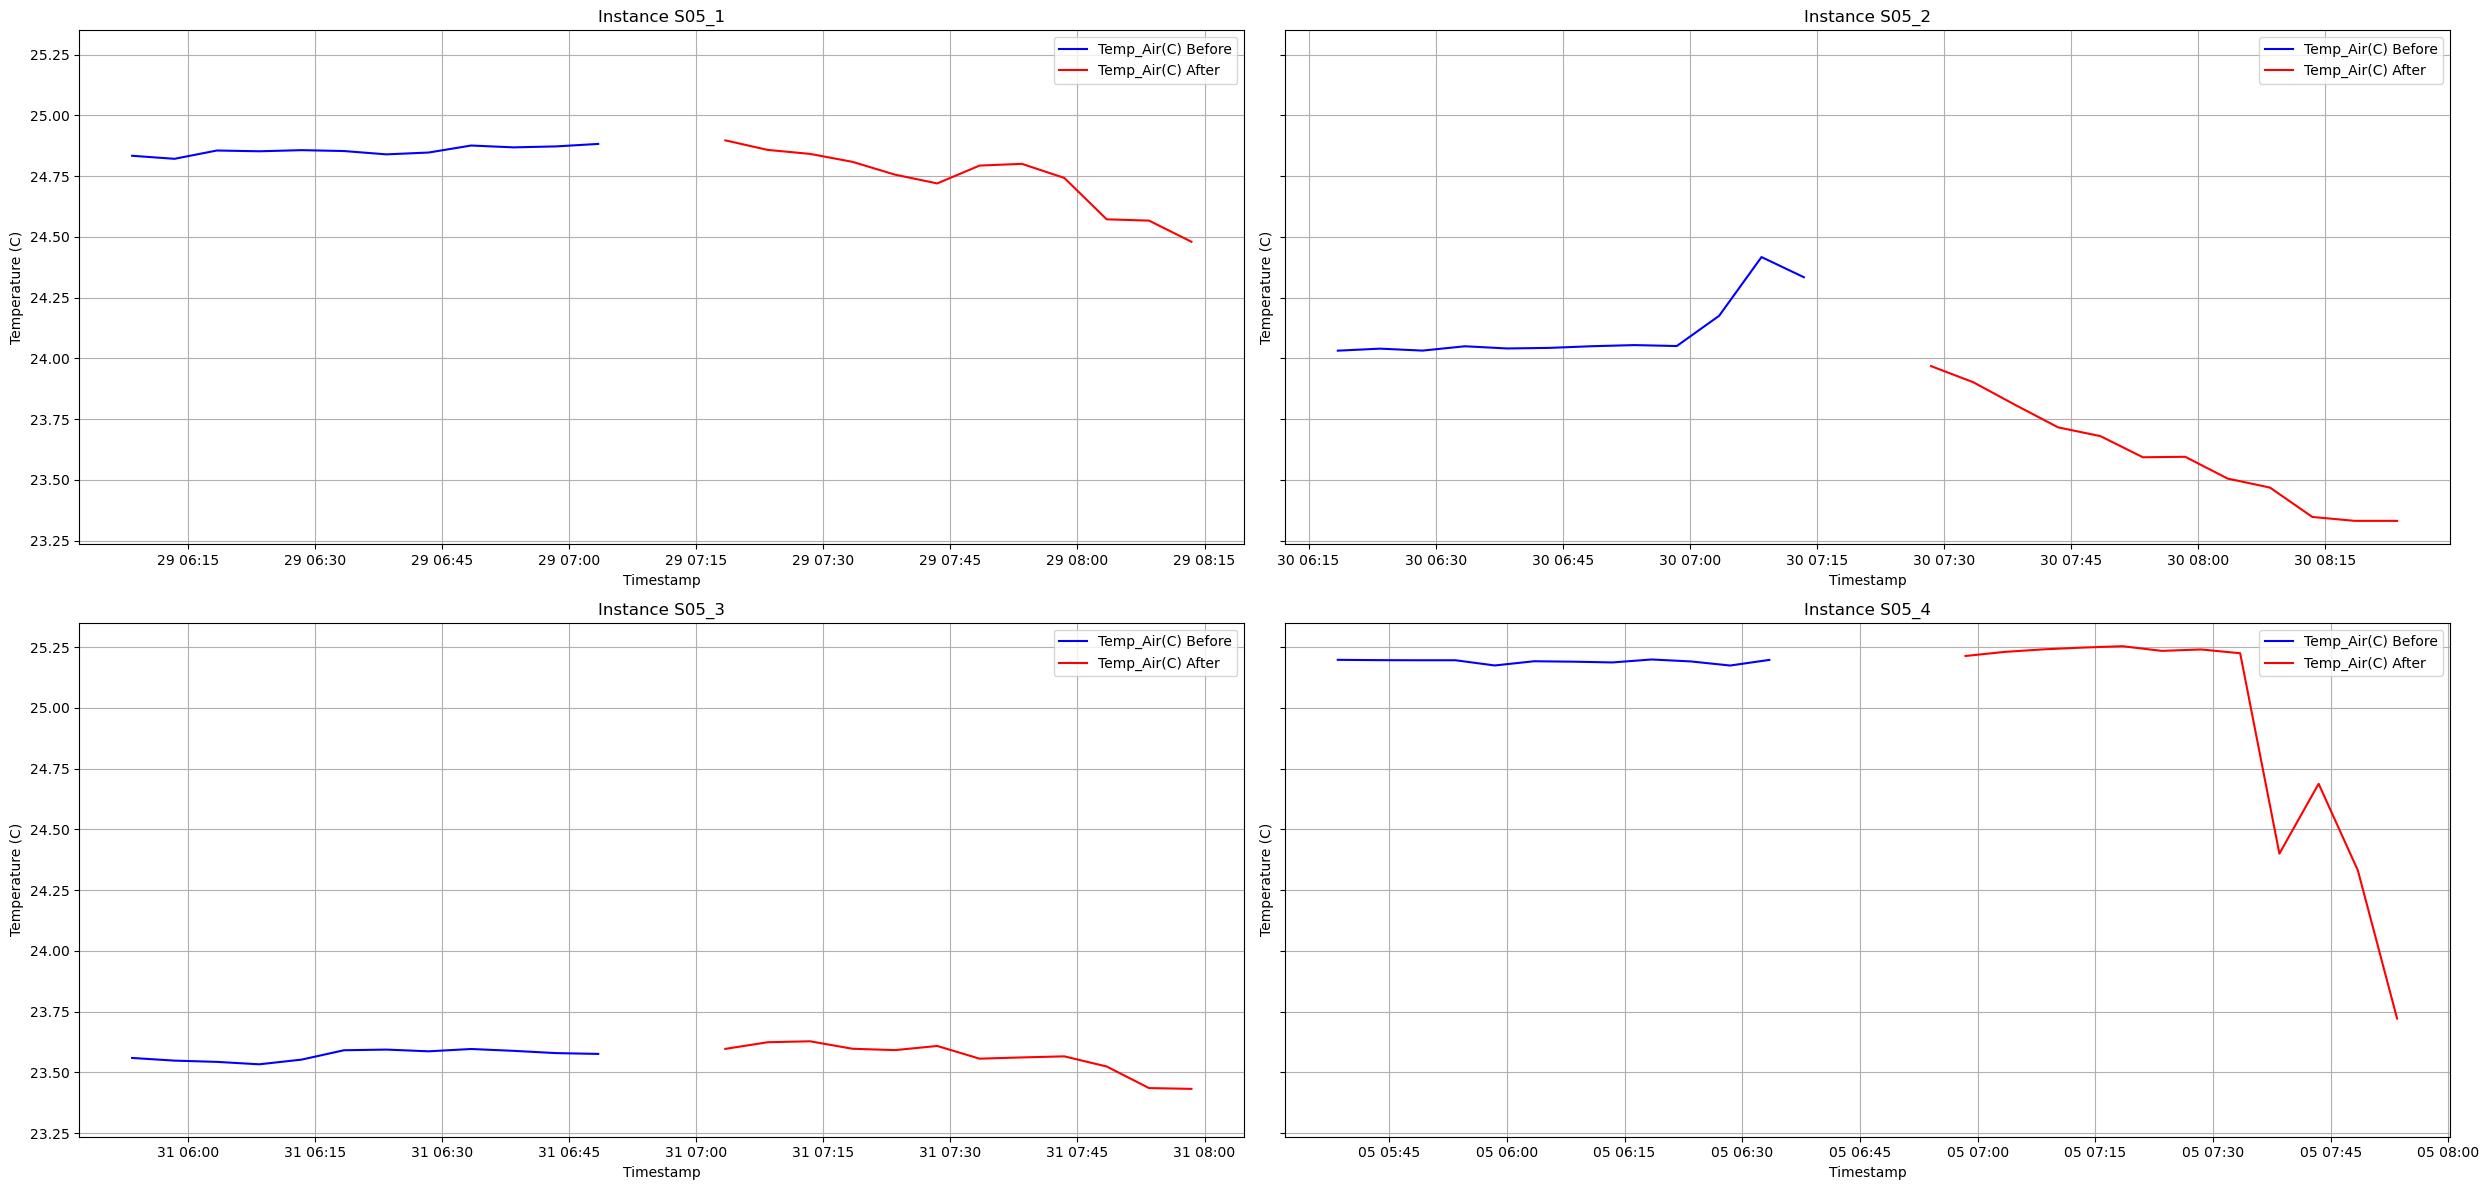

In [9]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S05_1", "Start Time": "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time": "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time": "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time": "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before and after for each instance, creating a subplot matrix
def plot_temperatures_before_after(commuting_instances, data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')
        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance
plot_temperatures_before_after(commuting_instances, data)


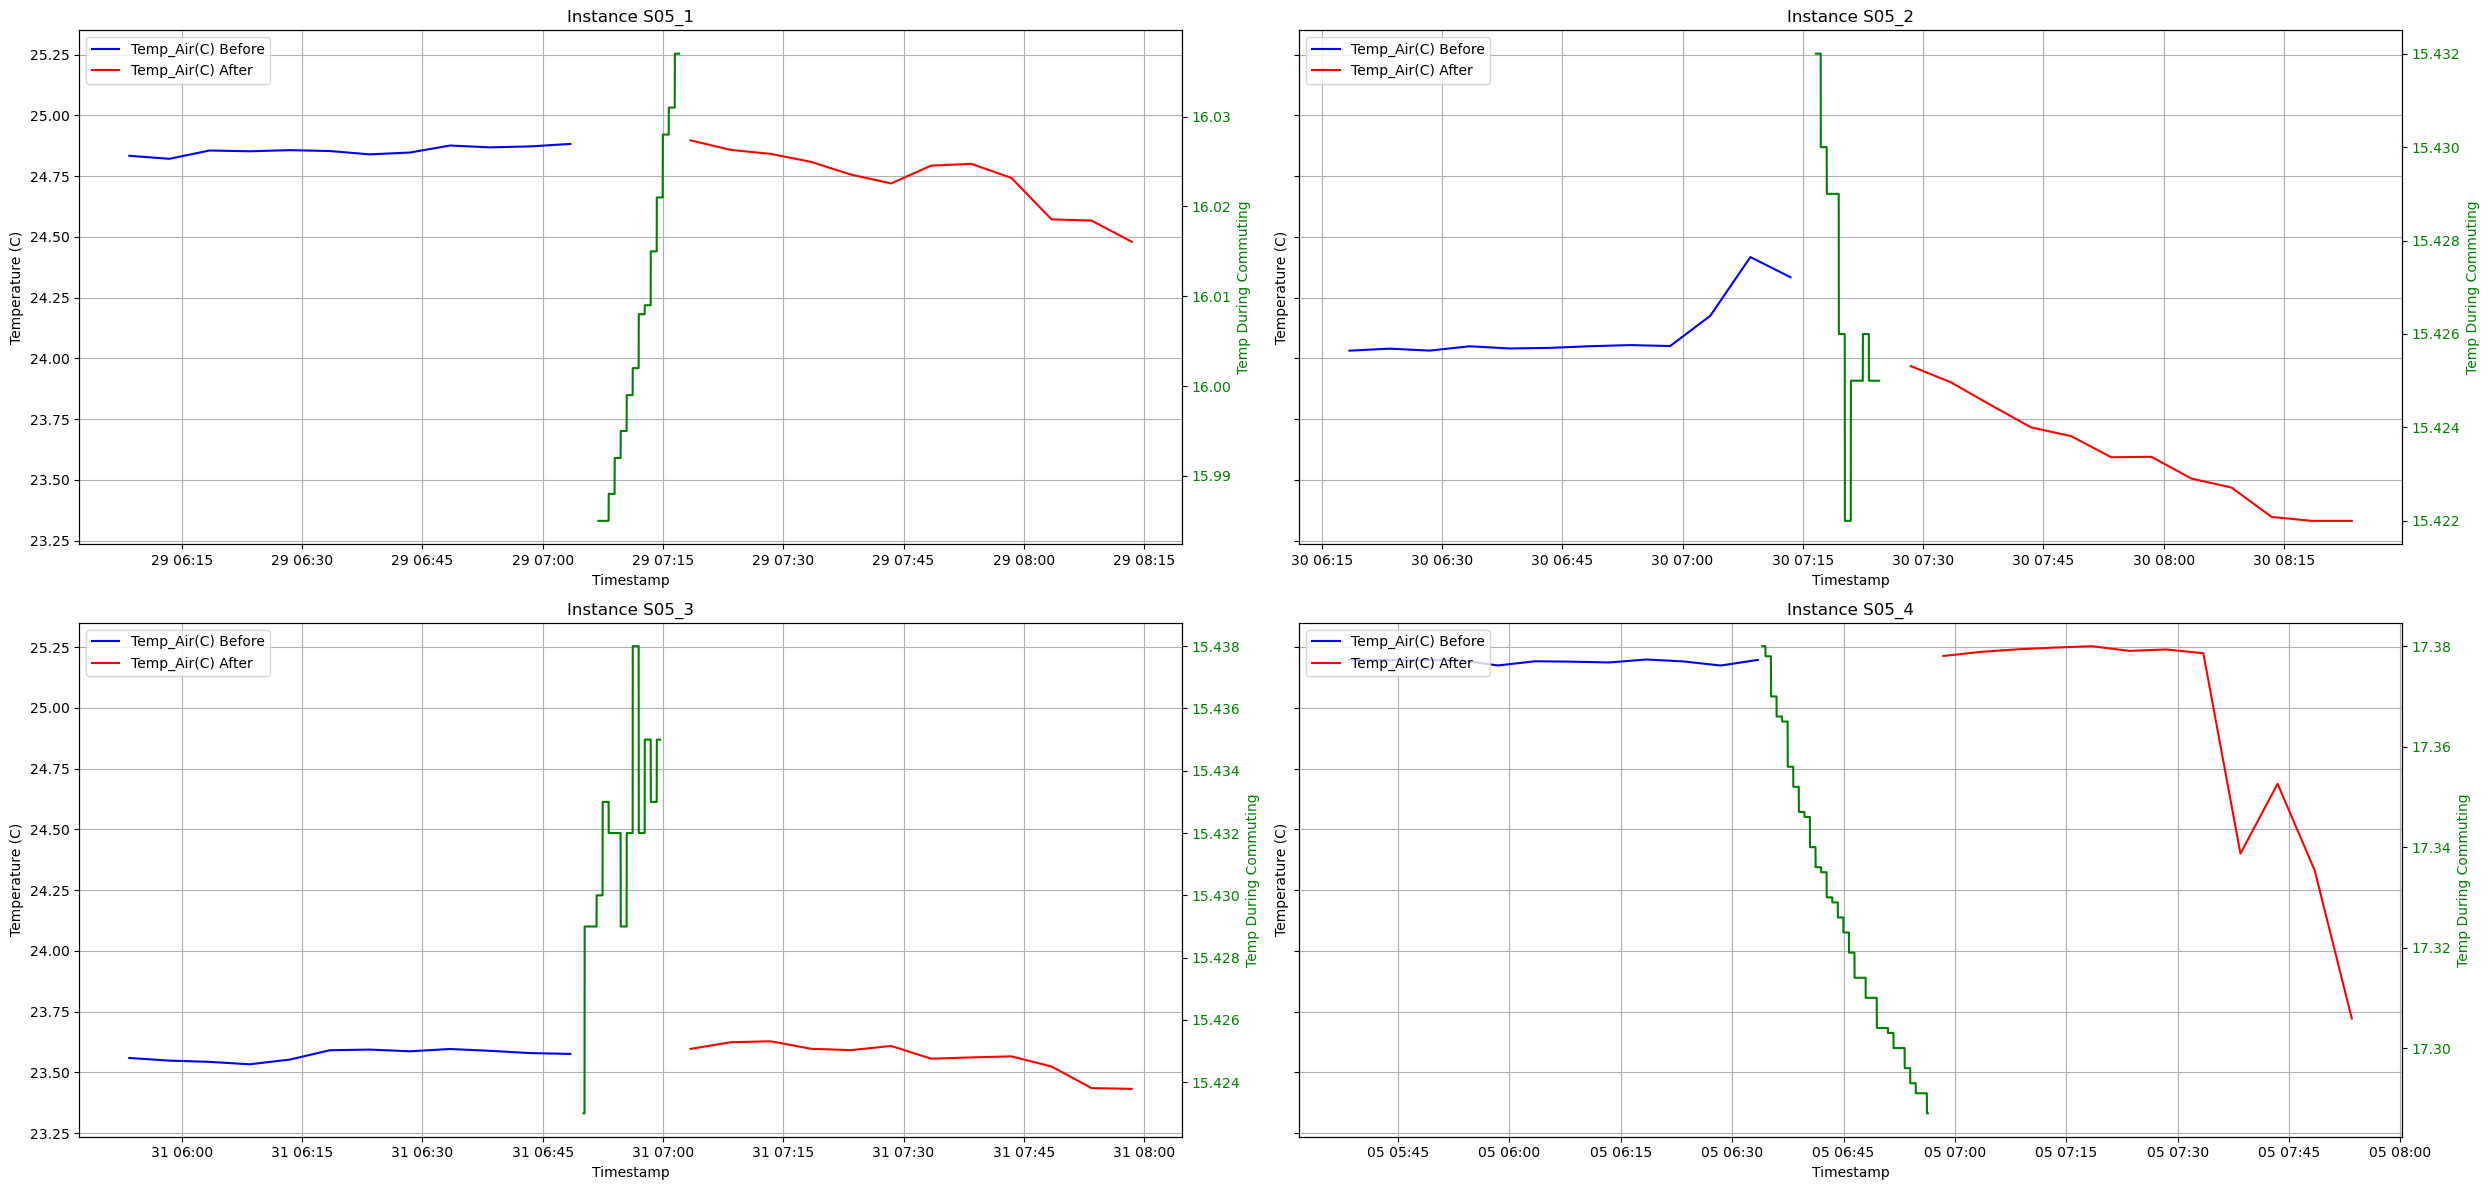

In [12]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'

data = pd.read_csv(data_file_path)
commuting_data = S05_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S05_1", "Start Time": "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time": "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time": "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time": "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data['Timestamp'], during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


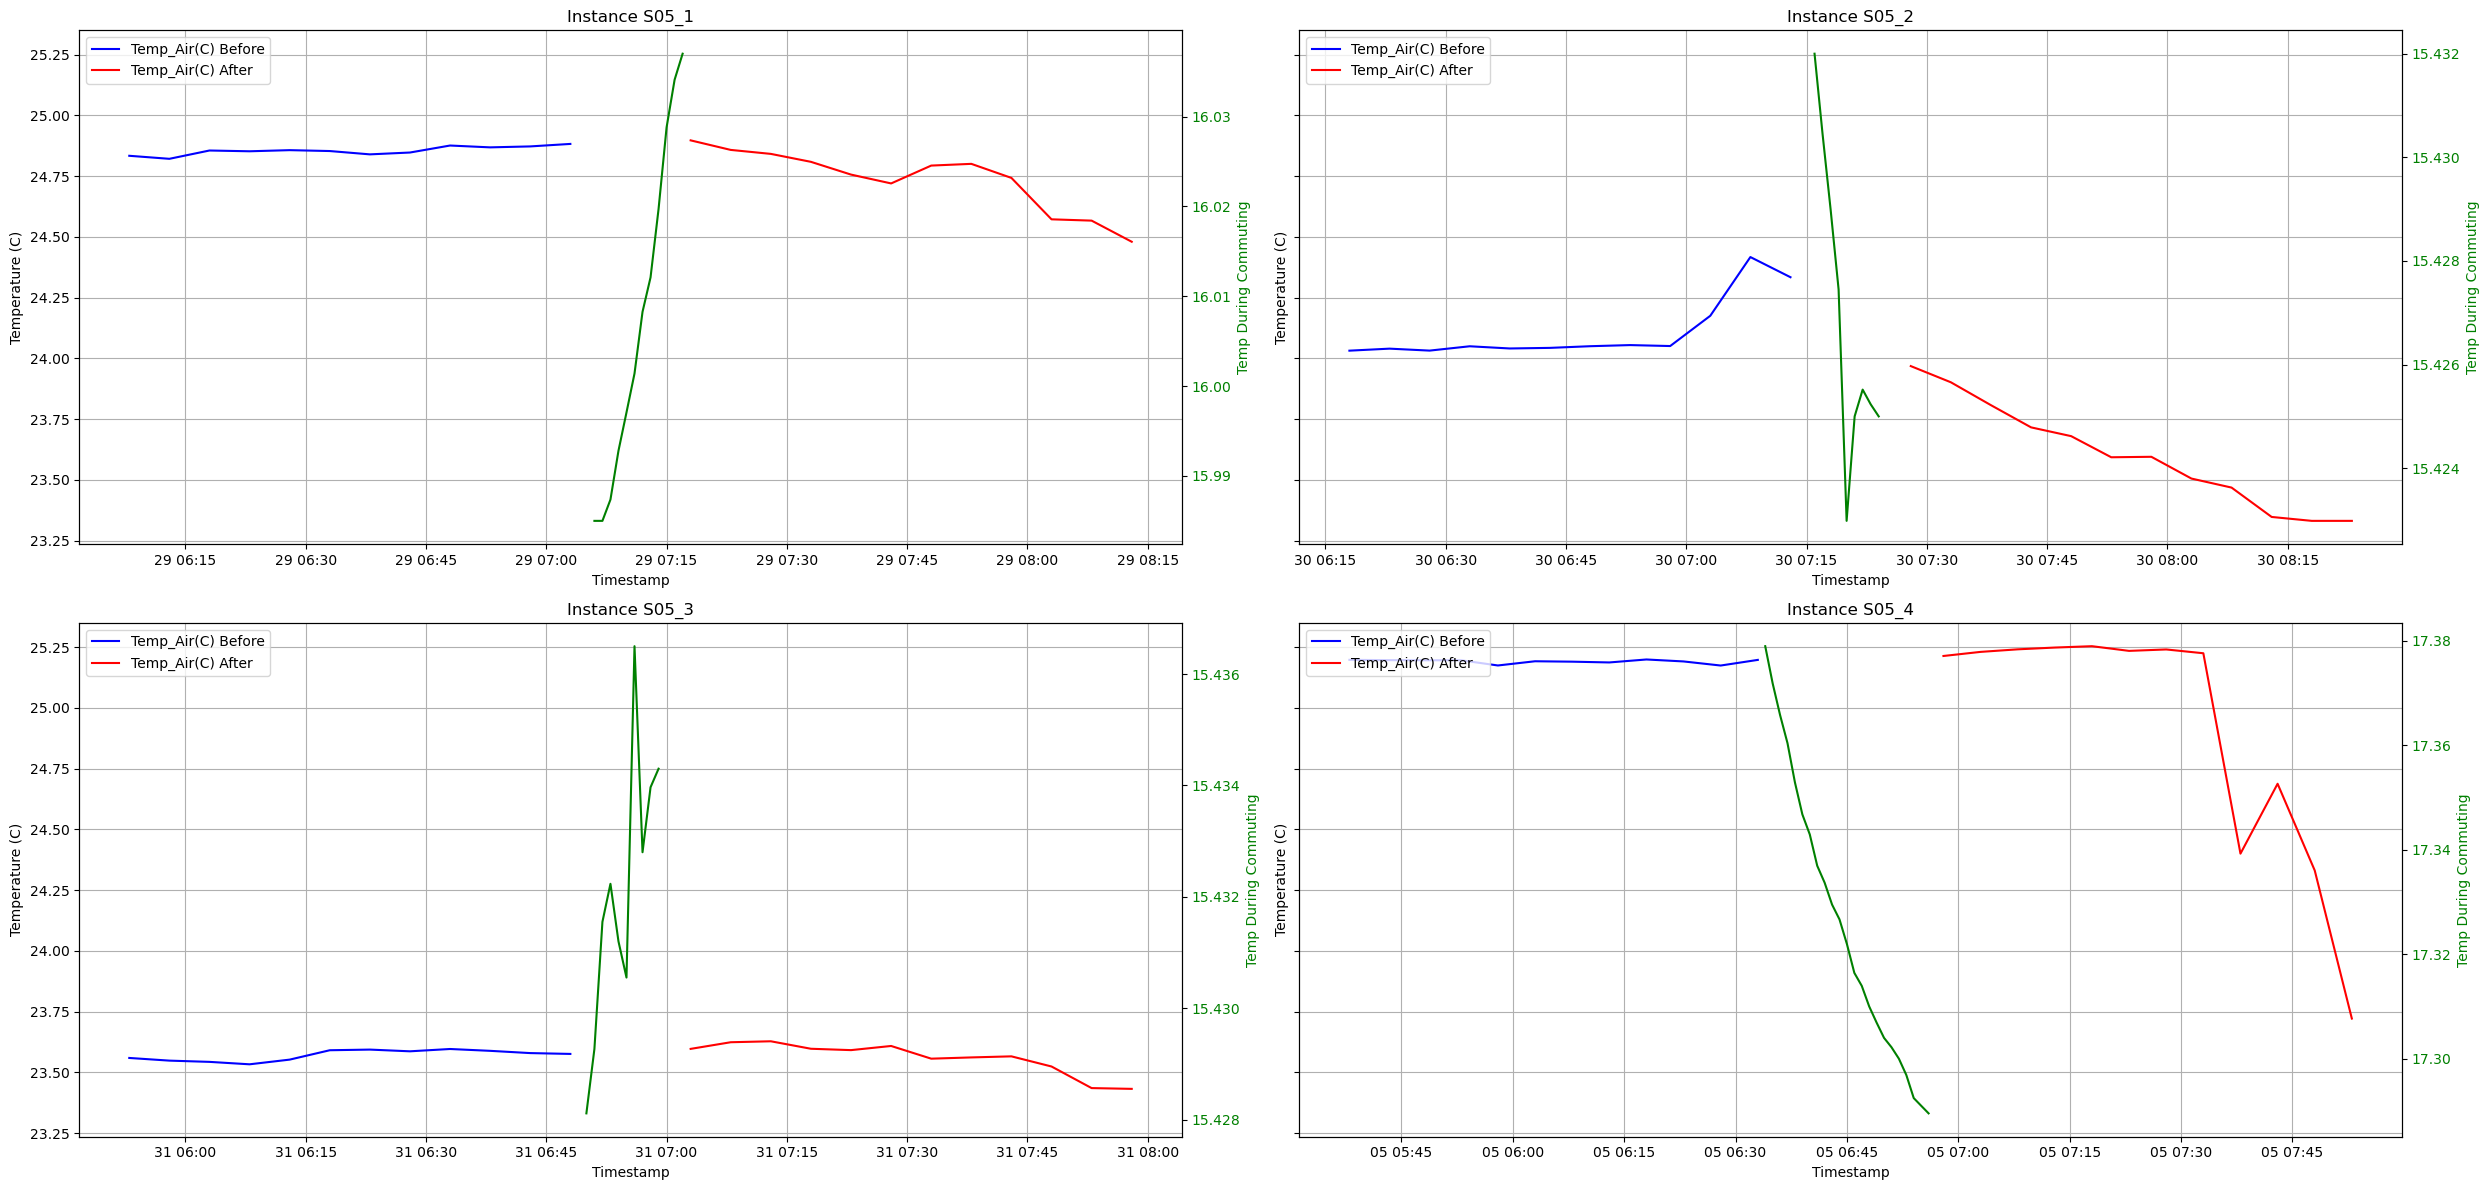

In [14]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'

data = pd.read_csv(data_file_path)
commuting_data = S05_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S05_1", "Start Time": "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time": "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time": "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time": "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data.index, before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


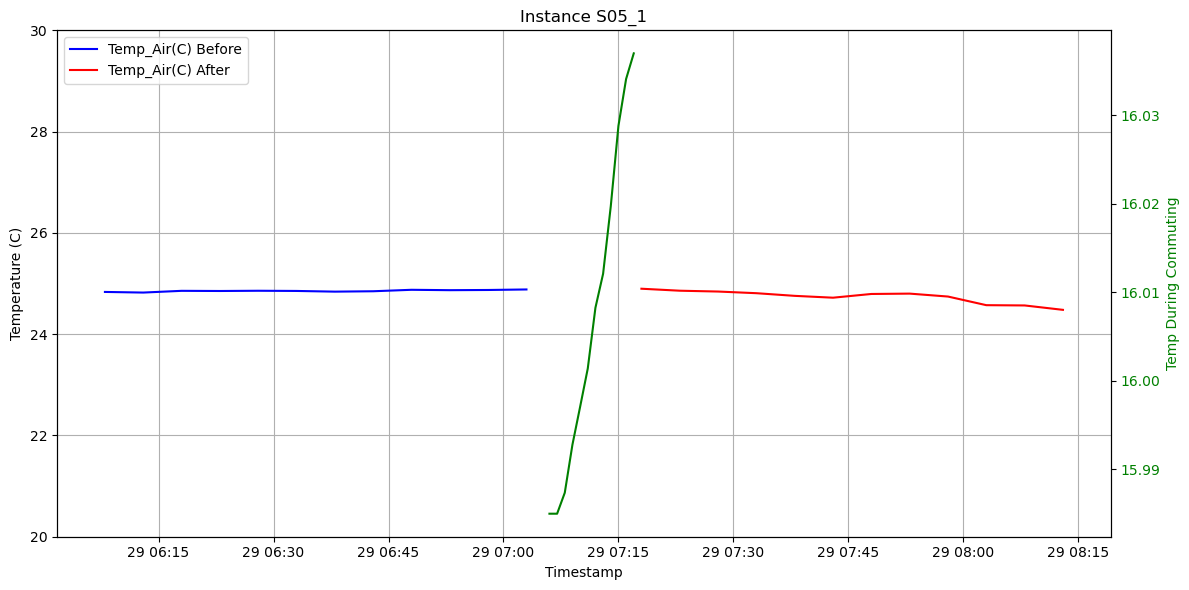

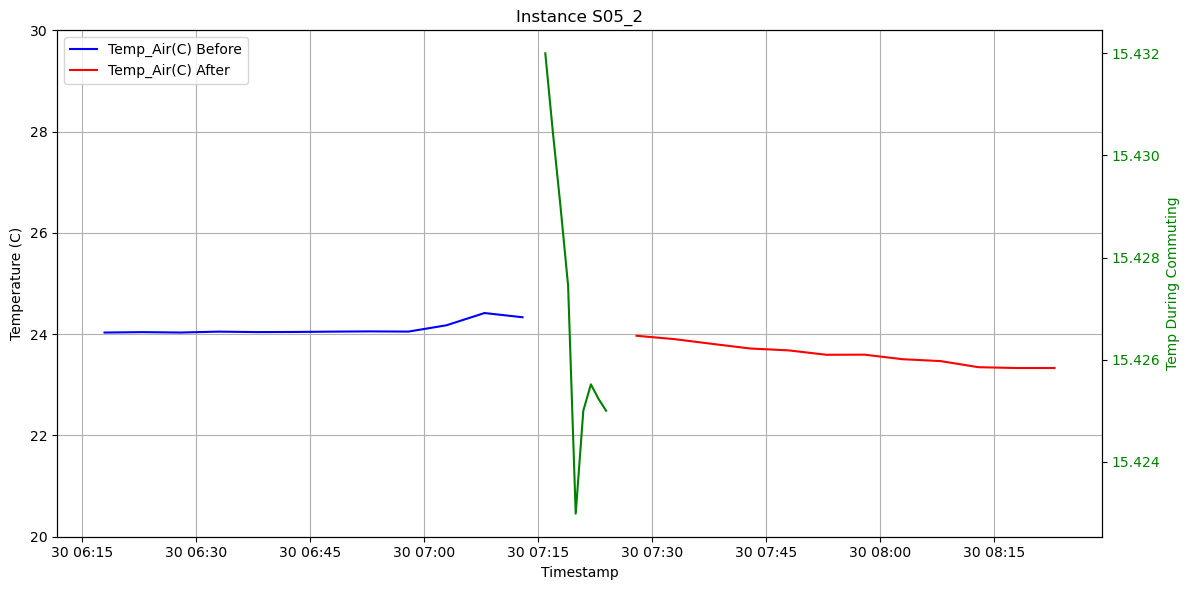

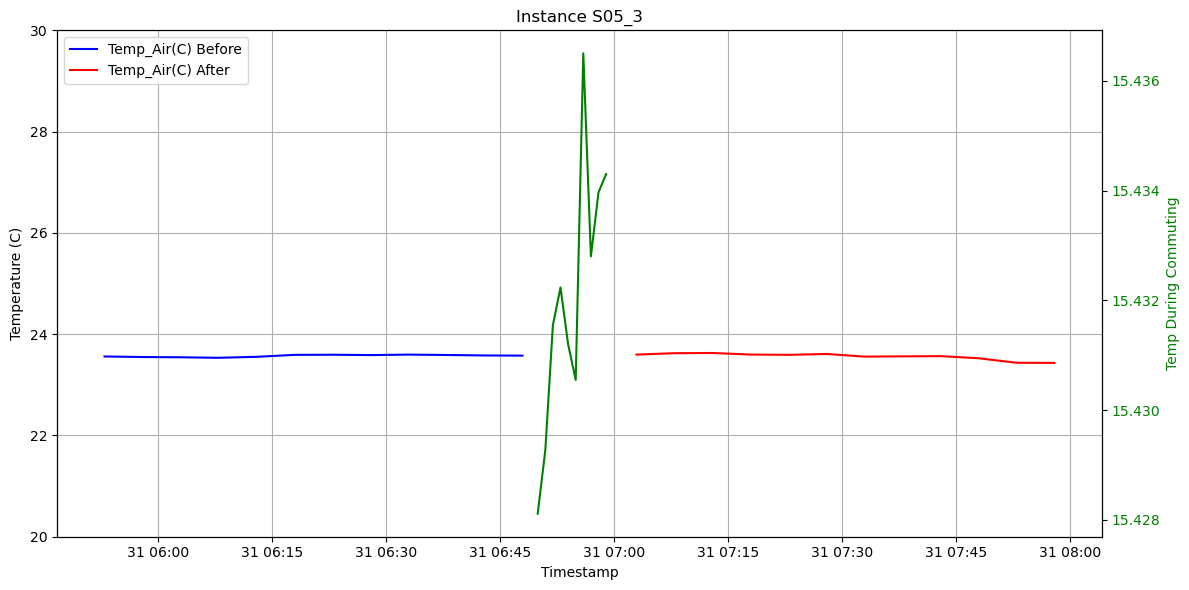

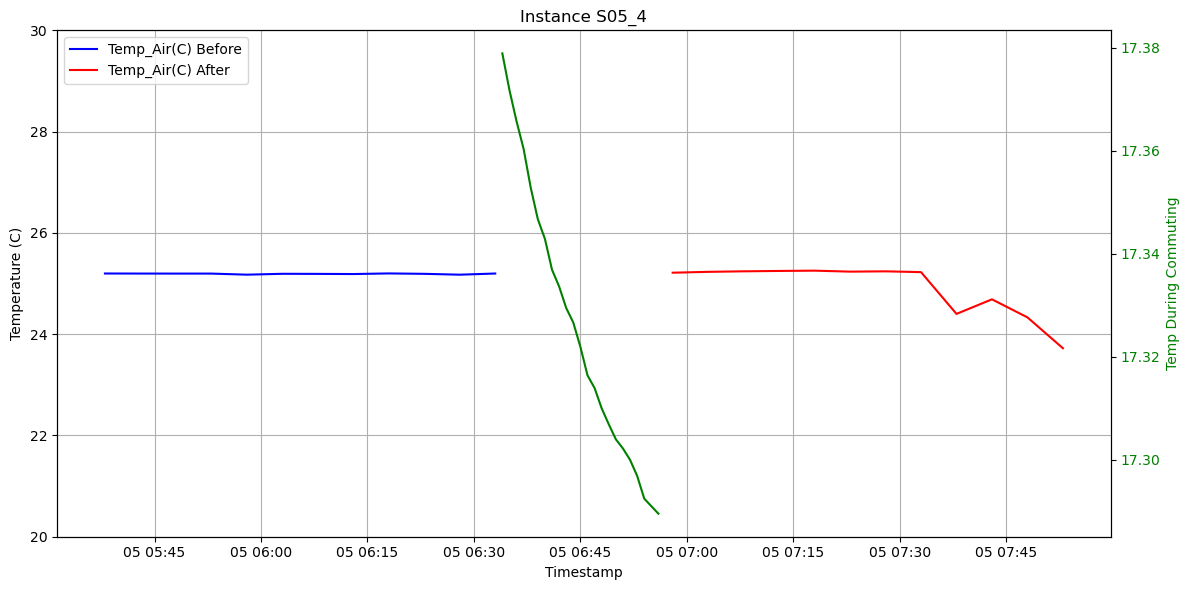

In [15]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'

data = pd.read_csv(data_file_path)
commuting_data = S05_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S05_1", "Start Time": "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time": "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time": "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time": "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(before_data.index, before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data.index, after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Set consistent y-axis limits for the primary y-axis
        ax.set_ylim(primary_y_axis_limits)

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


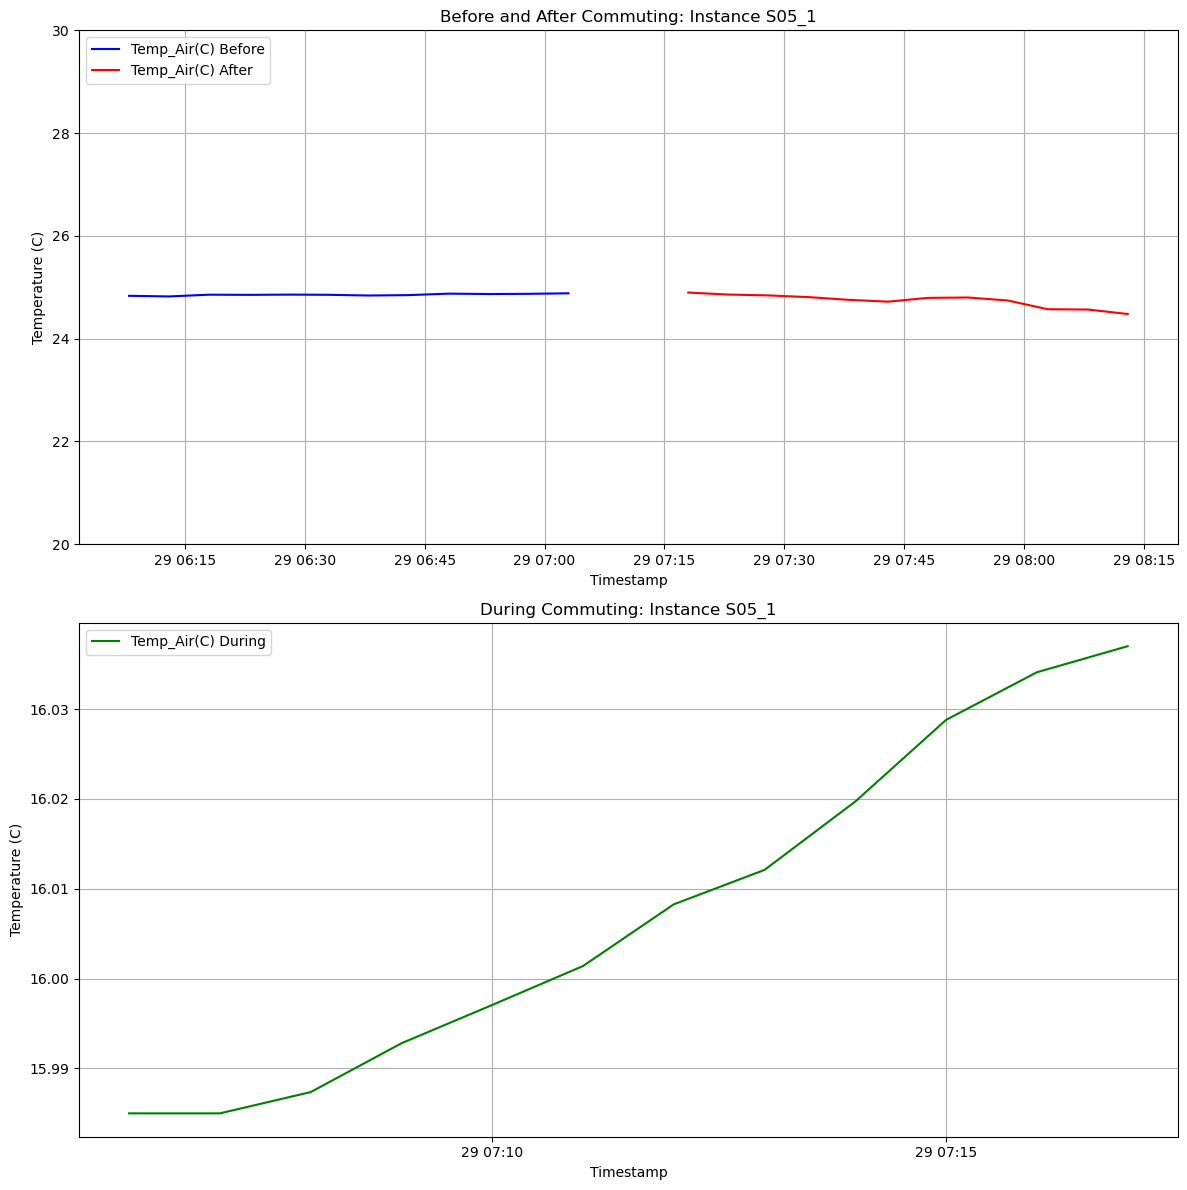

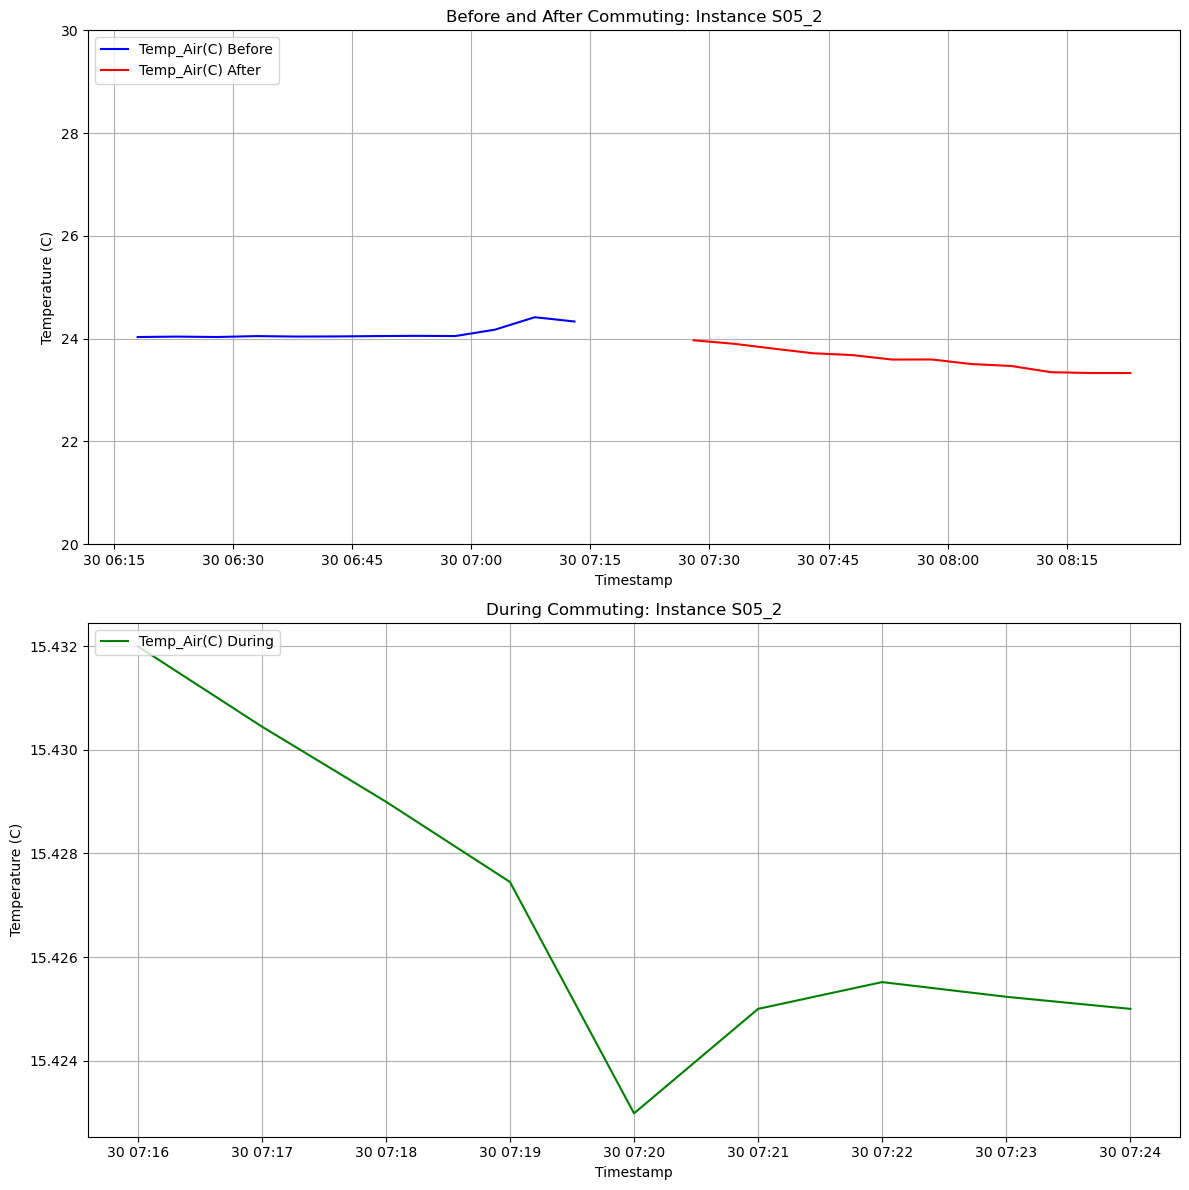

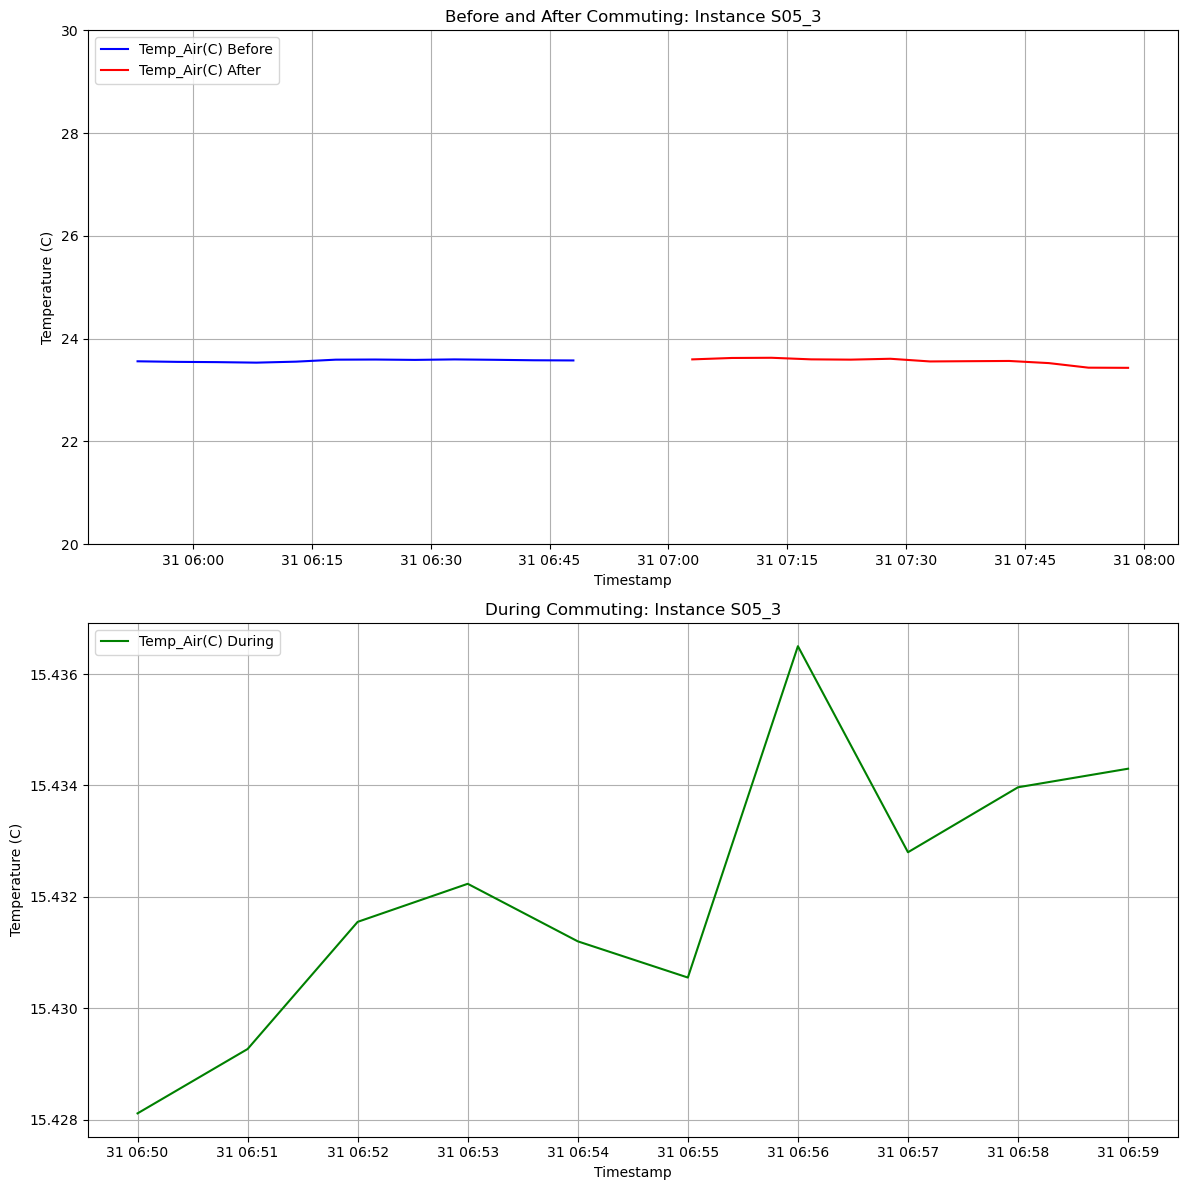

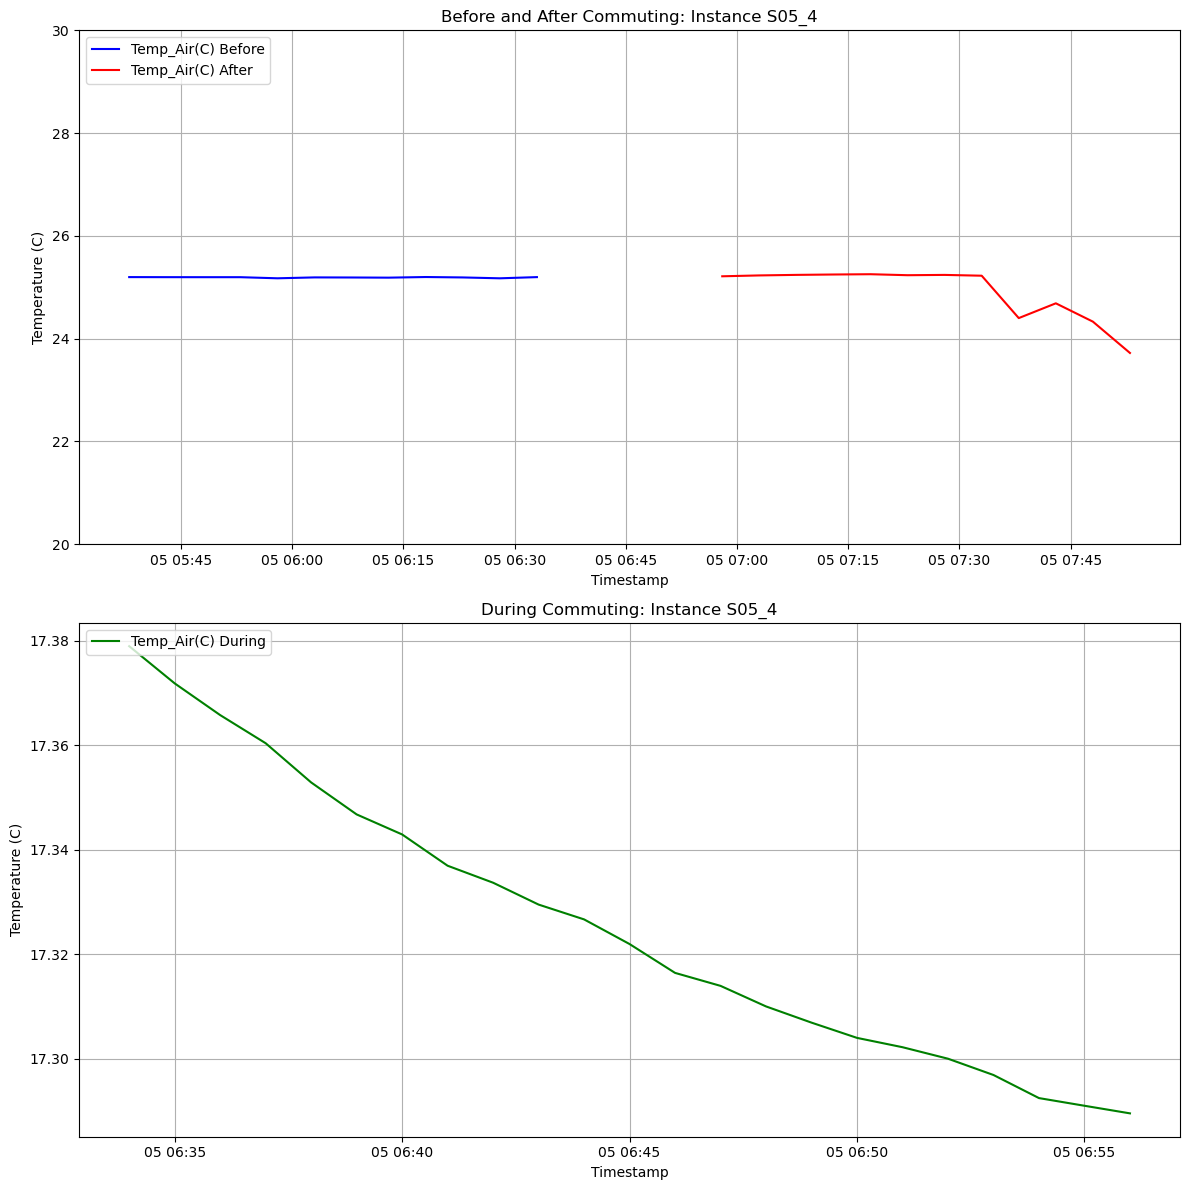

In [6]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'

data = pd.read_csv(data_file_path)
commuting_data = S05_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": "S05_1", "Start Time": "2023-08-29 07:06:57", "End Time": "2023-08-29 07:17:01"},
    {"ID_instance": "S05_2", "Start Time": "2023-08-30 07:16:37", "End Time": "2023-08-30 07:24:30"},
    {"ID_instance": "S05_3", "Start Time": "2023-08-31 06:50:06", "End Time": "2023-08-31 06:59:39"},
    {"ID_instance": "S05_4", "Start Time": "2023-09-05 06:34:03", "End Time": "2023-09-05 06:56:21"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (20, 30)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

        # Plot Before and After Commuting on the first subplot
        ax1.plot(before_data.index, before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax1.plot(after_data.index, after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')
        ax1.set_ylim(primary_y_axis_limits)
        ax1.set_title(f'Before and After Commuting: Instance {instance_id}')
        ax1.set_xlabel('Timestamp')
        ax1.set_ylabel('Temperature (C)')
        ax1.legend(loc='upper left')
        ax1.grid(True)

        # Plot During Commuting on the second subplot
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_title(f'During Commuting: Instance {instance_id}')
        ax2.set_xlabel('Timestamp')
        ax2.set_ylabel('Temperature (C)')
        ax2.legend(loc='upper left')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)
